## Assignment 1 - Using Linear Regression to predict the pixels of larger image from a downsampled image

### Reading the input image

In [2]:
import cv2

In [3]:
img = cv2.imread('standard_test_images/peppers_gray.tif', 0)

In [4]:
print(img.shape)

(512, 512)


### Display the input image

In [5]:
import matplotlib.pyplot as plt

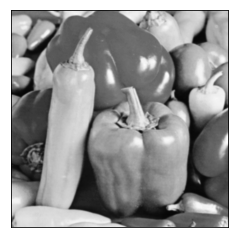

In [6]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

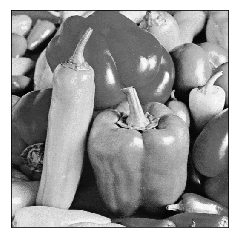

In [7]:
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

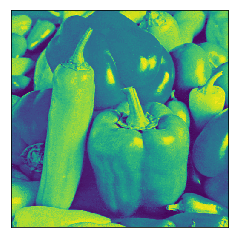

In [8]:
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

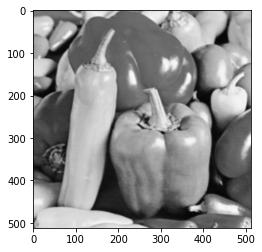

In [9]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

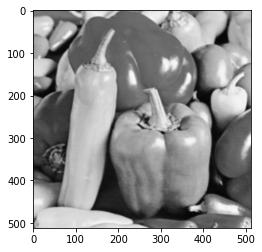

In [10]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

### Down sample the image by removing the pixels in alternate rows and columns